## Deep Learning Techniques

In [1]:
import tensorflow as tf
from tensorflow.keras import Model, layers, regularizers, initializers
import numpy as np
from matplotlib import pyplot as plt
import random

random.seed(5)
np.random.seed(5)
tf.random.set_seed(5)

### CiFAR-10 Load

In [2]:
from sklearn.model_selection import train_test_split


(x_trainval, y_trainval), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_trainval.shape, x_test.shape, y_trainval.shape, y_test.shape)

x_train, x_valid, y_train, y_valid = train_test_split(
    x_trainval,
    y_trainval,
    test_size=1/6,
    shuffle=True,
    stratify=y_trainval, random_state=34
)
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)
(41666, 32, 32, 3) (8334, 32, 32, 3) (41666, 1) (8334, 1)


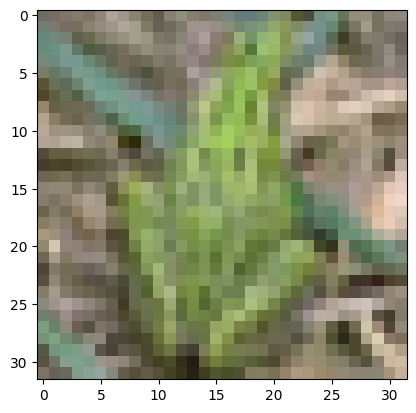

In [3]:
plt.imshow(x_train[0])

In [4]:
num_features = np.prod(x_train[0].shape)
num_classes = 10

x_train, x_valid, x_test = x_train.reshape(-1, num_features), x_valid.reshape(-1, num_features), x_test.reshape(-1, num_features)
x_train, x_valid, x_test = x_train.astype('float32') / 255, x_valid.astype('float32') / 255, x_test.astype('float32') / 255

### Early stopping

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(
    optimizer='SGD',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [6]:
batch_size = 256
epochs = 100

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

result = model.fit(
    x_train,
    y_train,
    validation_data=(x_valid, y_valid),
    callbacks=[callback],
    batch_size=batch_size,
    epochs=epochs
)

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1784 - loss: 2.2344 - val_accuracy: 0.2838 - val_loss: 2.0321
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2951 - loss: 1.9971 - val_accuracy: 0.3258 - val_loss: 1.9220
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3275 - loss: 1.9069 - val_accuracy: 0.3465 - val_loss: 1.8667
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3507 - loss: 1.8579 - val_accuracy: 0.3591 - val_loss: 1.8292
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3660 - loss: 1.8229 - val_accuracy: 0.3698 - val_loss: 1.7998
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3770 - loss: 1.7939 - val_accuracy: 0.3752 - val_loss: 1.7755
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3862 - loss: 1.7696 - val_accuracy: 0.3834 - val_loss: 1.7548
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3939 - loss: 1.7483 - val_acc

In [7]:
def loss_curves(result, title=None):
    plt.plot(result.history['accuracy'])
    plt.plot(result.history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.grid()
    plt.legend(['train','validation'], loc='best')

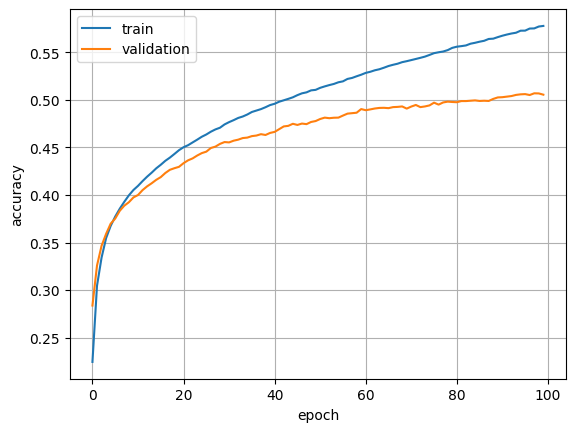

In [8]:
loss_curves(result)

### Activation functions

In [9]:
model_sig = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])
model_sig.compile(
    optimizer='SGD',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.1100 - loss: 2.3482 - val_accuracy: 0.1615 - val_loss: 2.2928
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1581 - loss: 2.2913 - val_accuracy: 0.1977 - val_loss: 2.2842
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1819 - loss: 2.2828 - val_accuracy: 0.2127 - val_loss: 2.2754
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2013 - loss: 2.2740 - val_accuracy: 0.2213 - val_loss: 2.2661
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2149 - loss: 2.2647 - val_accuracy: 0.2282 - val_loss: 2.2562
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2279 - loss: 2.2547 - val_accuracy: 0.2347 - val_loss: 2.2452
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2367 - loss: 2.2436 - val_accuracy: 0.2406 - val_loss: 2.2330
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2452 - loss: 2.2313 - val_acc

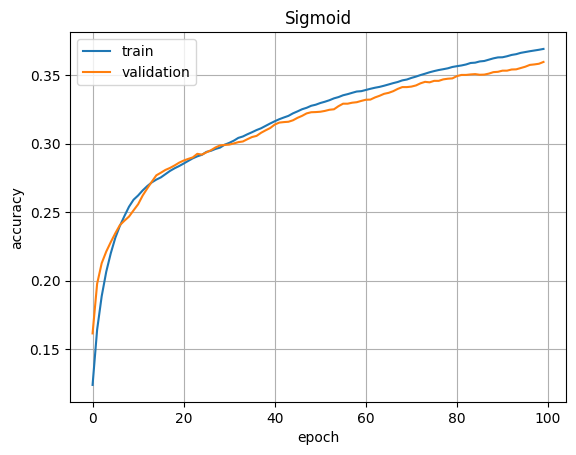

In [10]:
result = model_sig.fit(
    x_train,
    y_train,
    validation_data=(x_valid, y_valid),
    batch_size=batch_size,
    epochs=epochs
)

loss_curves(result, 'Sigmoid')

### Batch Normalization

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.2758 - loss: 2.1660 - val_accuracy: 0.3443 - val_loss: 1.8793
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4069 - loss: 1.7009 - val_accuracy: 0.3884 - val_loss: 1.7033
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4424 - loss: 1.5987 - val_accuracy: 0.4078 - val_loss: 1.6475
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4621 - loss: 1.5392 - val_accuracy: 0.4251 - val_loss: 1.6186
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4789 - loss: 1.4922 - val_accuracy: 0.4336 - val_loss: 1.5945
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4926 - loss: 1.4545 - val_accuracy: 0.4443 - val_loss: 1.5612
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5040 - loss: 1.4224 - val_accuracy: 0.4455 - val_loss: 1.5578
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5130 - loss: 1.3946 - val_acc

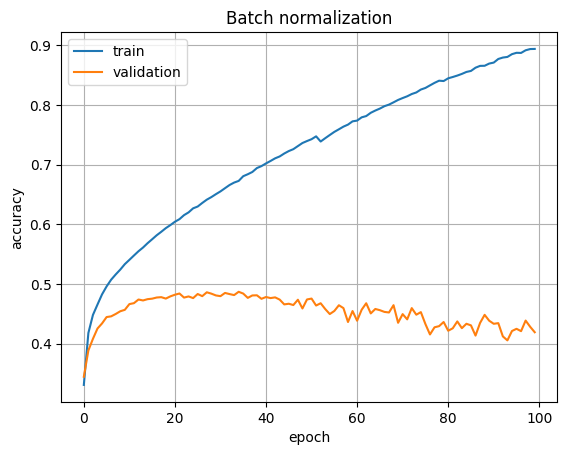

In [11]:
model_bn = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10)
])

model_bn.compile(
    optimizer='SGD',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

result = model_bn.fit(
    x_train,
    y_train,
    validation_data=(x_valid, y_valid),
    batch_size=batch_size,
    epochs=epochs
)

loss_curves(result, 'Batch normalization')

### Weight Initialization & Weight Decay

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1776 - loss: 6.3483 - val_accuracy: 0.2741 - val_loss: 5.9766
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2828 - loss: 5.8829 - val_accuracy: 0.3131 - val_loss: 5.6279
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3202 - loss: 5.5542 - val_accuracy: 0.3335 - val_loss: 5.3466
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3410 - loss: 5.2828 - val_accuracy: 0.3473 - val_loss: 5.0996
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3545 - loss: 5.0426 - val_accuracy: 0.3549 - val_loss: 4.8762
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3625 - loss: 4.8239 - val_accuracy: 0.3620 - val_loss: 4.6703
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3685 - loss: 4.6218 - val_accuracy: 0.3680 - val_loss: 4.4799
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3749 - loss: 4.4341 - val_acc

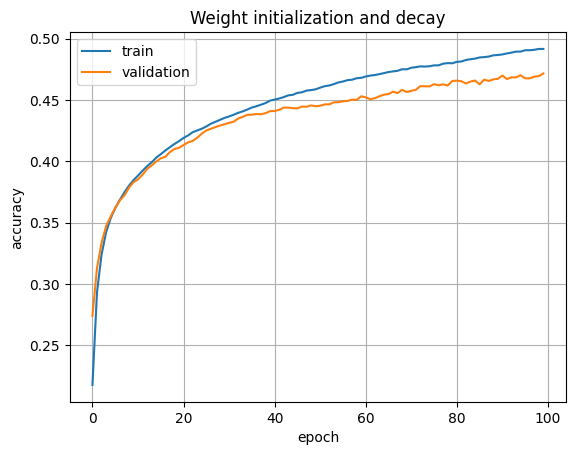

In [12]:
model_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(
        128,
        kernel_initializer=initializers.GlorotNormal(),
        kernel_regularizer=regularizers.l2(0.01),
        activation='relu'
    ),
    tf.keras.layers.Dense(
        256,
        kernel_initializer=initializers.GlorotNormal(),
        kernel_regularizer=regularizers.l2(0.01),
        activation='relu'
    ),
    tf.keras.layers.Dense(10)
])

model_reg.compile(
    optimizer='SGD',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

result = model_reg.fit(
    x_train,
    y_train,
    validation_data=(x_valid, y_valid),
    batch_size=batch_size,
    epochs=epochs
)

loss_curves(result, 'Weight initialization and decay')

### Dropout

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.1771 - loss: 2.2231 - val_accuracy: 0.2923 - val_loss: 2.0173
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2698 - loss: 2.0229 - val_accuracy: 0.3233 - val_loss: 1.9225
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3069 - loss: 1.9425 - val_accuracy: 0.3433 - val_loss: 1.8703
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3285 - loss: 1.8936 - val_accuracy: 0.3503 - val_loss: 1.8348
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3413 - loss: 1.8614 - val_accuracy: 0.3643 - val_loss: 1.8075
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3537 - loss: 1.8325 - val_accuracy: 0.3717 - val_loss: 1.7805
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3573 - loss: 1.8110 - val_accuracy: 0.3775 - val_loss: 1.7604
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3708 - loss: 1.7850 - val_acc

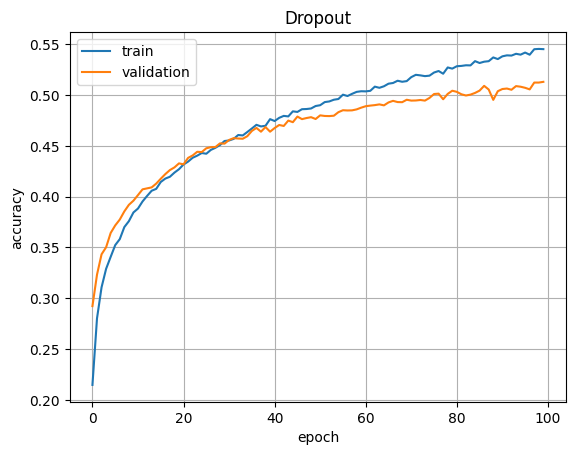

In [13]:
model_do = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(10)
])

model_do.compile(
    optimizer='SGD',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

result = model_do.fit(
    x_train,
    y_train,
    validation_data=(x_valid, y_valid),
    batch_size=batch_size,
    epochs=epochs
)

loss_curves(result, 'Dropout')

### Adam Optimizer

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.2501 - loss: 2.0750 - val_accuracy: 0.3492 - val_loss: 1.7826
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3711 - loss: 1.7602 - val_accuracy: 0.3879 - val_loss: 1.6880
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4111 - loss: 1.6593 - val_accuracy: 0.4227 - val_loss: 1.6167
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4338 - loss: 1.5965 - val_accuracy: 0.4390 - val_loss: 1.5743
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4495 - loss: 1.5500 - val_accuracy: 0.4510 - val_loss: 1.5465
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4605 - loss: 1.5169 - val_accuracy: 0.4567 - val_loss: 1.5185
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4706 - loss: 1.4872 - val_accuracy: 0.4557 - val_loss: 1.5108
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4766 - loss: 1.4645 - val_acc

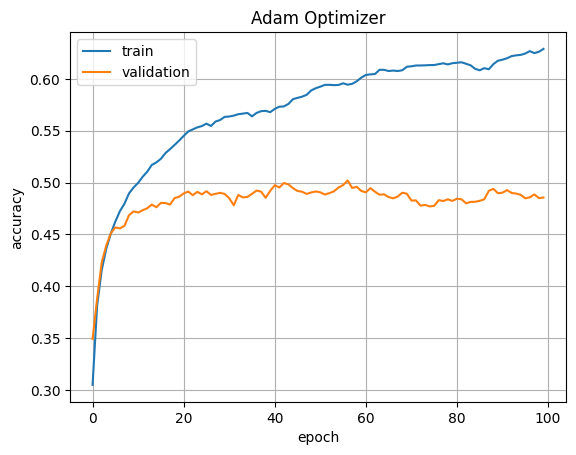

In [14]:
model_adam = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_adam.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

result = model_adam.fit(
    x_train,
    y_train,
    validation_data=(x_valid, y_valid),
    batch_size=batch_size,
    epochs=epochs
)

loss_curves(result, 'Adam Optimizer')